# Filter Method without SMOTE-ENN

## Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split , GridSearchCV , KFold
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, make_scorer, confusion_matrix, log_loss
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

## Import Data

In [2]:
# Import  the SPSS data file
df=pd.read_spss("E:\Data Analysis\BDHS_2017-2018.sav")
# Displaying the first 5 rows of the DataFrame
df.head()

,V013,V024,V025,V106,V701,V130,V151,V201,V123,V124,...,V190,V190A,V113,V116,V161,V213,V404,V743A,V312,BMI2
0,15-19,Rajshahi,Rural,Secondary,No education,Islam,Male,No child,No,No,...,Poorest,Poorest,Improved,Improved,Solid fuel,No or unsure,No,Respondent and husband/partner,Modern methods,Underweight/Normal
1,45-49,Rangpur,Urban,Primary,No education,Islam,Male,More than two child,No,No,...,Poorest,Poorest,Improved,Improved,Solid fuel,No or unsure,No,Respondent and husband/partner,Traditional methods,Underweight/Normal
2,15-19,Khulna,Rural,Secondary,Primary,Islam,Male,One child,No,No,...,Poorer,Poorer,Improved,Improved,Solid fuel,No or unsure,Yes,Respondent and husband/partner,Modern methods,Underweight/Normal
3,40-44,Barisal,Urban,Primary,Primary,Islam,Male,More than two child,No,No,...,Poorest,Poorest,Improved,Improved,Solid fuel,No or unsure,No,Respondent and husband/partner,Not using,Underweight/Normal
4,25-29,Barisal,Rural,Secondary,Higher,Islam,Male,One child,No,No,...,Richer,Richest,Improved,Improved,Solid fuel,Yes,No,Respondent and husband/partner,Not using,Underweight/Normal


## Get some Basic Information

In [3]:
# Displaying a summary of the DataFrame, including the number of non-null entries and data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16303 entries, 0 to 16302
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   V013    16303 non-null  category
 1   V024    16303 non-null  category
 2   V025    16303 non-null  category
 3   V106    16303 non-null  category
 4   V701    16303 non-null  category
 5   V130    16303 non-null  category
 6   V151    16303 non-null  category
 7   V201    16303 non-null  category
 8   V123    16303 non-null  category
 9   V124    16303 non-null  category
 10  V125    16303 non-null  category
 11  V119    16303 non-null  category
 12  V122    16303 non-null  category
 13  V121    16303 non-null  category
 14  V159    16303 non-null  category
 15  V716    16303 non-null  category
 16  V704    16303 non-null  category
 17  V190    16303 non-null  category
 18  V190A   16303 non-null  category
 19  V113    16303 non-null  category
 20  V116    16303 non-null  category
 21  V161    1630

In [4]:
# Checking missing values
df.isnull().sum().sum()

0

In [5]:
# Checking the dimensions of the DataFrame
df.shape

(16303, 27)

In [6]:
# Displaying the column labels (names) of the DataFrame
df.columns

Index(['V013', 'V024', 'V025', 'V106', 'V701', 'V130', 'V151', 'V201', 'V123',
       'V124', 'V125', 'V119', 'V122', 'V121', 'V159', 'V716', 'V704', 'V190',
       'V190A', 'V113', 'V116', 'V161', 'V213', 'V404', 'V743A', 'V312',
       'BMI2'],
      dtype='object')

In [7]:
# Counting the frequency of each unique value in the 'BMI2' column
df.BMI2.value_counts()

BMI2
Underweight/Normal    10951
Overweight/Obese       5352
Name: count, dtype: int64

## Feature Transformation

In [8]:
# Transform the selected features
V013 = {'15-19': 1, '20-24': 2,'25-29':3,'30-34':4,'35-39':5,'40-44':6,'45-49':7}
df['V013'] = df['V013'].map(V013)
V024 = {'Barisal': 1, 'Chittagong': 2,'Dhaka':3,'Khulna':4,'Mymensingh':5,'Rajshahi':6,'Rangpur':7,'Sylhet':8}
df['V024'] = df['V024'].map(V024)
V025 = {'Urban': 1, 'Rural': 2}
df['V025'] = df['V025'].map(V025)
V106 = {'No education': 0, 'Primary': 1,'Secondary':2,'Higher':3}
df['V106'] = df['V106'].map(V106)
V701= {'No education': 0, 'Primary': 1,'Secondary':2,'Higher':3,"Don't know":4}
df['V701'] = df['V701'].map(V701)
V130 = {'Islam': 0, 'Hinduism': 1,'Buddhism':2,'Christianity':3}
df['V130'] = df['V130'].map(V130)
V151= {'Male': 1, 'Female': 2}
df['V151'] = df['V151'].map(V151)
V201= {'No child': 0, 'One child': 1,'Two child':2,'More than two child':3}
df['V201'] = df['V201'].map(V201)
V123= {'No': 0, 'Yes': 1}
df['V123'] = df['V123'].map(V123)
V124= {'No': 0, 'Yes': 1}
df['V124'] = df['V124'].map(V124)
V125= {'No': 0, 'Yes': 1}
df['V125'] = df['V125'].map(V125)
V119= {'No': 0, 'Yes': 1}
df['V119'] = df['V119'].map(V119)
V122= {'No': 0, 'Yes': 1}
df['V122'] = df['V122'].map(V122)
V121= {'No': 0, 'Yes': 1}
df['V121'] = df['V121'].map(V121)
V159= {'Not at all': 0, 'Less than once a week': 1,'At least once a week':2,'Almost every day':3}
df['V159'] = df['V159'].map(V159)
V716= {'Unemployed': 0, 'Agriculture': 1,'Business':2,'Labor/ Service':3,'Job':4}
df['V716'] = df['V716'].map(V716)
V704= {'Unemployed': 0, 'Agriculture': 1,'Business':2,'Labor/ Service':3,'Job':4}
df['V704'] = df['V704'].map(V704)
V190= {'Poorest': 1, 'Poorer': 2,'Middle':3,'Richer':4,'Richest':5}
df['V190'] = df['V190'].map(V190)
V190A= {'Poorest': 1, 'Poorer': 2,'Middle':3,'Richer':4,'Richest':5}
df['V190A'] = df['V190A'].map(V190A)
V113= {'Improved': 1, 'Unimproved': 2}
df['V113'] = df['V113'].map(V113)
V116= {'Improved': 1, 'Unimproved': 2}
df['V116'] = df['V116'].map(V116)
V161= {'Solid fuel': 0, 'Clean fuel': 1}
df['V161'] = df['V161'].map(V161)
V213= {'No or unsure': 0, 'Yes': 1}
df['V213'] = df['V213'].map(V213)
V404= {'No': 0, 'Yes': 1}
df['V404'] = df['V404'].map(V404)
V743A= {'Respondent alone': 1, 'Respondent and husband/partner': 2, "Respondent and other's person": 3}
df['V743A'] = df['V743A'].map(V743A)
V312= {'Not using': 0, 'Modern methods': 1,'Traditional methods':2}
df['V312'] = df['V312'].map(V312)
BMI2= {'Underweight/Normal': 0, 'Overweight/Obese': 1}
df['BMI2'] = df['BMI2'].map(BMI2)

In [9]:
# Displaying the first 5 rows of the DataFrame after transformation
df.head()

,V013,V024,V025,V106,V701,V130,V151,V201,V123,V124,...,V190,V190A,V113,V116,V161,V213,V404,V743A,V312,BMI2
0,1,6,2,2,0,0,1,0,0,0,...,1,1,1,1,0,0,0,2,1,0
1,7,7,1,1,0,0,1,3,0,0,...,1,1,1,1,0,0,0,2,2,0
2,1,4,2,2,1,0,1,1,0,0,...,2,2,1,1,0,0,1,2,1,0
3,6,1,1,1,1,0,1,3,0,0,...,1,1,1,1,0,0,0,2,0,0
4,3,1,2,2,3,0,1,1,0,0,...,4,5,1,1,0,1,0,2,0,0


In [10]:
# Checking missing values after transformation
df.isnull().sum().sum()

0

## Define Explanatory and Outcome Variable

In [11]:
# Drop the Outcome variable from the DataFrame in order to create explanatory variavle
x=df.drop(["BMI2"],axis=1)
y=df["BMI2"]

In [12]:
# Checking the dimensions of the explanatory and outcome variable
x.shape, y.shape

((16303, 26), (16303,))

## Explanatory Data Analysis (EDA)

### BMI2 Graph

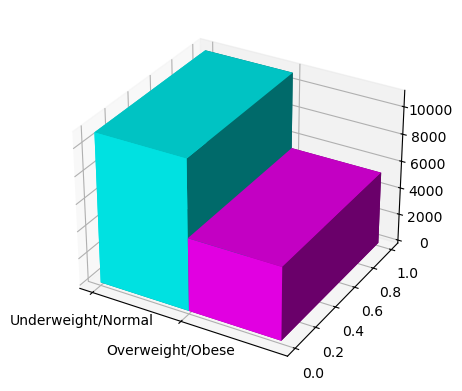

In [13]:
# Calculate the counts for each category in y
counts = np.bincount(y)

# Set up the figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the X, Y, and Z coordinates for the bars
X = np.arange(len(counts))  # [0, 1] for two categories
Y = np.zeros_like(X)  # Y values are all zeros, used just for plotting
Z = np.zeros_like(X)  # Z values are the base of the bars, all zeros

# Define the width, depth, and height of the bars
dx = np.ones_like(X)
dy = np.ones_like(Y)
dz = counts

# Create the bars
ax.bar3d(X, Y, Z, dx, dy, dz, color=['cyan', 'magenta'], zsort='average')

# Set labels and title
ax.set_xticks(X)
ax.set_xticklabels(BMI2)
# Set labels and title with Times New Roman font style
font = {'fontname': 'Times New Roman'}
# Show the plot
plt.show()

### Correlation

In [14]:
# Calculating and displaying the correlation matrix, showing the correlation coefficients between the features of the DataFrame
corr=df.corr()
corr

,V013,V024,V025,V106,V701,V130,V151,V201,V123,V124,...,V190,V190A,V113,V116,V161,V213,V404,V743A,V312,BMI2
V013,1.000000,0.012270,0.000005,-0.372709,-0.180281,0.041279,-0.016666,0.628503,0.057086,-0.008857,...,0.033628,0.050007,-0.005947,-0.015388,-0.014718,-0.205750,-0.376753,-0.153510,0.075661,0.164128
V024,0.012270,1.000000,0.072954,-0.084455,-0.084267,0.055474,-0.079159,0.015849,0.147911,0.066598,...,-0.101378,-0.075478,0.003749,0.037304,-0.104859,0.007359,0.027689,0.038750,0.021058,-0.088859
V025,0.000005,0.072954,1.000000,-0.150652,-0.178218,0.002744,0.042323,0.085681,0.112747,-0.055957,...,-0.426624,0.031221,0.063251,0.135389,-0.488728,0.001918,0.027265,0.028443,-0.051644,-0.159486
V106,-0.372709,-0.084455,-0.150652,1.000000,0.624033,0.037122,0.034919,-0.406391,0.043280,0.225866,...,0.405645,0.391025,-0.019958,-0.241745,0.229329,0.084036,0.134791,0.046227,-0.023164,0.114590
V701,-0.180281,-0.084267,-0.178218,0.624033,1.000000,0.057236,0.045746,-0.290724,0.041009,0.256817,...,0.472606,0.455129,-0.019901,-0.281662,0.272436,0.034932,0.057019,0.035624,-0.022194,0.160627
V130,0.041279,0.055474,0.002744,0.037122,0.057236,1.000000,-0.053993,-0.042693,0.024064,0.009224,...,-0.018309,-0.012792,0.022688,-0.001122,-0.003387,-0.014777,-0.014139,0.026270,0.047909,-0.001419
V151,-0.016666,-0.079159,0.042323,0.034919,0.045746,-0.053993,1.000000,0.004826,-0.091827,-0.066338,...,0.048400,0.068024,-0.001981,-0.018295,-0.003931,-0.013122,-0.008311,-0.177119,-0.206784,0.017575
V201,0.628503,0.015849,0.085681,-0.406391,-0.290724,-0.042693,0.004826,1.000000,0.021947,-0.083450,...,-0.147240,-0.113775,0.005818,0.090481,-0.106746,-0.227950,-0.044287,-0.135992,0.201682,0.063840
V123,0.057086,0.147911,0.112747,0.043280,0.041009,0.024064,-0.091827,0.021947,1.000000,0.068383,...,0.017298,0.078099,-0.011324,-0.050438,-0.151448,-0.014816,-0.047293,0.044226,0.041050,0.000699
V124,-0.008857,0.066598,-0.055957,0.225866,0.256817,0.009224,-0.066338,-0.083450,0.068383,1.000000,...,0.303283,0.307286,-0.014719,-0.149957,0.093582,0.015073,-0.002484,0.037984,0.016878,0.115980


In [15]:
#correlation heatmap
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,V013,V024,V025,V106,V701,V130,V151,V201,V123,V124,V125,V119,V122,V121,V159,V716,V704,V190,V190A,V113,V116,V161,V213,V404,V743A,V312,BMI2
V013,1.00,0.01,0.00,-0.37,-0.18,0.04,-0.02,0.63,0.06,-0.01,0.01,0.02,0.03,0.02,-0.04,0.07,-0.21,0.03,0.05,-0.01,-0.02,-0.01,-0.21,-0.38,-0.15,0.08,0.16
V024,0.01,1.00,0.07,-0.08,-0.08,0.06,-0.08,0.02,0.15,0.07,0.00,0.01,-0.11,-0.04,-0.04,0.02,-0.09,-0.10,-0.08,0.00,0.04,-0.10,0.01,0.03,0.04,0.02,-0.09
V025,0.00,0.07,1.00,-0.15,-0.18,0.00,0.04,0.09,0.11,-0.06,-0.07,-0.22,-0.28,-0.30,-0.28,-0.08,-0.23,-0.43,0.03,0.06,0.14,-0.49,0.00,0.03,0.03,-0.05,-0.16
V106,-0.37,-0.08,-0.15,1.00,0.62,0.04,0.03,-0.41,0.04,0.23,0.07,0.18,0.36,0.26,0.27,-0.01,0.26,0.41,0.39,-0.02,-0.24,0.23,0.08,0.13,0.05,-0.02,0.11
V701,-0.18,-0.08,-0.18,0.62,1.00,0.06,0.05,-0.29,0.04,0.26,0.07,0.19,0.41,0.29,0.26,-0.04,0.28,0.47,0.46,-0.02,-0.28,0.27,0.03,0.06,0.04,-0.02,0.16
V130,0.04,0.06,0.00,0.04,0.06,1.00,-0.05,-0.04,0.02,0.01,-0.01,-0.07,-0.06,0.03,0.04,0.05,-0.01,-0.02,-0.01,0.02,-0.00,-0.00,-0.01,-0.01,0.03,0.05,-0.00
V151,-0.02,-0.08,0.04,0.03,0.05,-0.05,1.00,0.00,-0.09,-0.07,-0.01,0.02,0.07,0.01,0.01,-0.04,0.17,0.05,0.07,-0.00,-0.02,-0.00,-0.01,-0.01,-0.18,-0.21,0.02
V201,0.63,0.02,0.09,-0.41,-0.29,-0.04,0.00,1.00,0.02,-0.08,-0.01,-0.06,-0.10,-0.10,-0.14,0.02,-0.20,-0.15,-0.11,0.01,0.09,-0.11,-0.23,-0.04,-0.14,0.20,0.06
V123,0.06,0.15,0.11,0.04,0.04,0.02,-0.09,0.02,1.00,0.07,-0.02,0.03,-0.02,0.04,0.03,0.02,-0.09,0.02,0.08,-0.01,-0.05,-0.15,-0.01,-0.05,0.04,0.04,0.00
V124,-0.01,0.07,-0.06,0.23,0.26,0.01,-0.07,-0.08,0.07,1.00,0.11,0.09,0.27,0.20,0.15,-0.02,0.07,0.30,0.31,-0.01,-0.15,0.09,0.02,-0.00,0.04,0.02,0.12


## Feature Selection: Filter Method (Chi-square)

In [16]:
# Calculating the Chi-square scores and p-values for each feature
chi2_score= chi2(x, y)
chi2_score

(array([3.64230846e+02, 1.44887655e+02, 5.60356773e+01, 1.19088677e+02,
        3.06459280e+02, 3.46799539e-02, 4.54975634e-01, 3.09842279e+01,
        5.52905151e-03, 1.97857287e+02, 3.96325375e+01, 5.49903434e+01,
        7.21063984e+02, 3.57693266e+02, 3.88077976e+02, 2.22947772e+00,
        4.28741357e+01, 8.37394362e+02, 6.22624381e+02, 5.89714186e-01,
        5.79877460e+01, 5.25091946e+02, 3.84785129e+00, 2.74026518e+02,
        2.25472098e+00, 2.61759563e+00]),
 array([3.37554719e-081, 2.27259691e-033, 7.11677764e-014, 1.00150685e-027,
        1.28991398e-068, 8.52267892e-001, 4.99981527e-001, 2.60133772e-008,
        9.40725852e-001, 6.12960153e-045, 3.06533390e-010, 1.21123463e-013,
        7.85775142e-159, 8.95103209e-080, 2.16923608e-086, 1.35399609e-001,
        5.83773872e-011, 4.00020851e-184, 2.00893462e-137, 4.42529663e-001,
        2.63755687e-014, 3.30165694e-116, 4.98097635e-002, 1.50442608e-061,
        1.33207464e-001, 1.05684469e-001]))

In [17]:
# Displaying the p-values in ascending order (smallest p-values first)
p_values = pd.Series(chi2_score[1])
p_values.index = x.columns
p_values.sort_values(ascending = True, inplace = True)
p_values

V190     4.000209e-184
V122     7.857751e-159
V190A    2.008935e-137
V161     3.301657e-116
V159      2.169236e-86
V013      3.375547e-81
V121      8.951032e-80
V701      1.289914e-68
V404      1.504426e-61
V124      6.129602e-45
V024      2.272597e-33
V106      1.001507e-27
V116      2.637557e-14
V025      7.116778e-14
V119      1.211235e-13
V704      5.837739e-11
V125      3.065334e-10
V201      2.601338e-08
V213      4.980976e-02
V312      1.056845e-01
V743A     1.332075e-01
V716      1.353996e-01
V113      4.425297e-01
V151      4.999815e-01
V130      8.522679e-01
V123      9.407259e-01
dtype: float64

<Axes: >

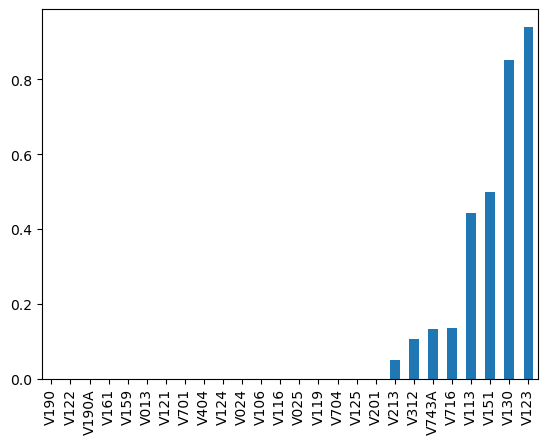

In [18]:
# Constructing a bar plot of the sorted p-values.
p_values.sort_values(ascending=True).plot.bar()

In [19]:
# Selecting the features with p-values,consider as 5% level of significance
chi2_selected_features = p_values[p_values < 0.05].index
chi2_selected_features

Index(['V190', 'V122', 'V190A', 'V161', 'V159', 'V013', 'V121', 'V701', 'V404',
       'V124', 'V024', 'V106', 'V116', 'V025', 'V119', 'V704', 'V125', 'V201',
       'V213'],
      dtype='object')

In [20]:
# Creating a new DataFrame containing only the selected features
x_selected=df[chi2_selected_features]
# Checking the dimensions of the selected DataFrame
x_selected.shape

(16303, 19)

## Train-Test Spliting

In [21]:
# Spliting the data set into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, random_state=42, stratify=y, test_size=.2)

In [22]:
# Checking the dimensions of the training and testing subsets
x_train.shape, x_test.shape

((13042, 19), (3261, 19))

In [23]:
# Checking the dimensions of the training and testing subsets
y_train.shape, y_test.shape

((13042,), (3261,))

In [24]:
x_train.head()

,V190,V122,V190A,V161,V159,V013,V121,V701,V404,V124,V024,V106,V116,V025,V119,V704,V125,V201,V213
6171,5,1,5,0,0,2,0,3,0,0,2,2,1,2,1,3,0,2,0
10899,1,0,2,0,0,6,0,1,0,0,3,1,2,2,1,1,0,3,0
8380,4,1,5,0,2,7,1,2,0,0,6,1,1,2,1,3,1,2,0
33,3,0,3,0,2,4,0,0,0,0,1,2,1,2,1,3,0,2,0
2904,3,0,3,0,0,7,0,2,0,0,5,2,1,2,1,1,0,3,0


In [25]:
y_train.head()

6171     1
10899    0
8380     0
33       0
2904     1
Name: BMI2, dtype: category
Categories (2, int64): [1, 0]

## (Default) Classification Algorithm in Machine Learning

### 1. Support Vector Machine (SVM)

In [26]:
# Initialize the SVM model
model_svm=SVC()
model_svm.fit(x_train, y_train) 
y_pred = model_svm.predict(x_test) 
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.92      0.82      2190
           1       0.67      0.31      0.42      1071

    accuracy                           0.72      3261
   macro avg       0.70      0.62      0.62      3261
weighted avg       0.71      0.72      0.69      3261



In [27]:
# Printing the default parameters
print(model_svm.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


<Axes: >

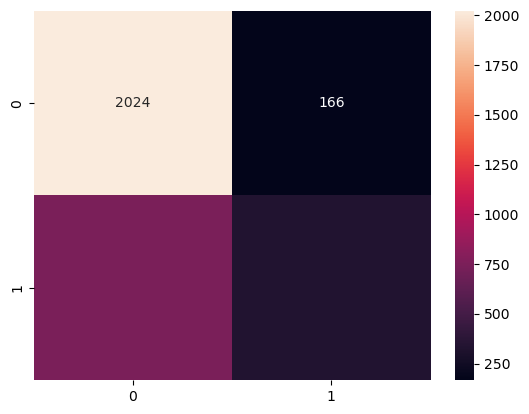

In [28]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt="d")

In [29]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [30]:
# Printing the performance evaluation
accuracy_svm= accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred)
kappa_svm = cohen_kappa_score(y_test, y_pred)
specificity_svm = specificity_score(y_test, y_pred)
log_loss_svm = log_loss(y_test, y_pred)
roc_auc_score_svm = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)
print("Kappa:",kappa_svm)
print("Specificity:", specificity_svm)
print("AUC:", roc_auc_score_svm)
print("Log Loss:", log_loss_svm) 

Accuracy: 0.7221711131554738
Precision: 0.6659959758551308
Recall: 0.30905695611577966
F1 Score: 0.4221938775510204
Kappa: 0.27026330102151963
Specificity: 0.9242009132420091
AUC: 0.6166289346788943
Log Loss: 10.013968098908354


### 2. Logistic Regression (LR)

In [31]:
# Initialize the SVM model
model_lr=LogisticRegression()
model_lr.fit(x_train, y_train) 
y_pred = model_lr.predict(x_test) 
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81      2190
           1       0.62      0.35      0.45      1071

    accuracy                           0.72      3261
   macro avg       0.68      0.62      0.63      3261
weighted avg       0.70      0.72      0.69      3261



In [32]:
# Printing the default parameters
print(model_lr.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


<Axes: >

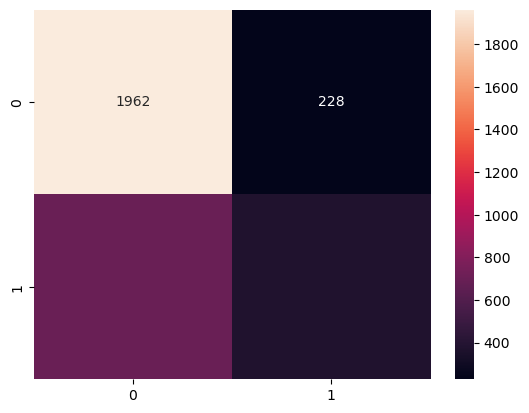

In [33]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt="d")

In [34]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [35]:
# Printing the performance evaluation
accuracy_lr= accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)
kappa_lr = cohen_kappa_score(y_test, y_pred)
specificity_lr = specificity_score(y_test, y_pred)
log_loss_lr = log_loss(y_test, y_pred)
roc_auc_score_lr = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)
print("Kappa:", kappa_lr)
print("Specificity:", specificity_lr)
print("AUC:", roc_auc_score_lr)
print("Log Loss:", log_loss_lr) 

Accuracy: 0.7157313707451702
Precision: 0.62
Recall: 0.3473389355742297
F1 Score: 0.4452423698384201
Kappa: 0.2740160679895993
Specificity: 0.8958904109589041
AUC: 0.6216146732665669
Log Loss: 10.246079942260534


### 3. Random Forest (RF)

In [36]:
# Initialize the SVM model
model_rf=RandomForestClassifier()
model_rf.fit(x_train, y_train) 
y_pred = model_rf.predict(x_test) 
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.84      0.79      2190
           1       0.54      0.37      0.44      1071

    accuracy                           0.69      3261
   macro avg       0.64      0.61      0.61      3261
weighted avg       0.67      0.69      0.67      3261



In [37]:
# Printing the default parameters
print(model_rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


<Axes: >

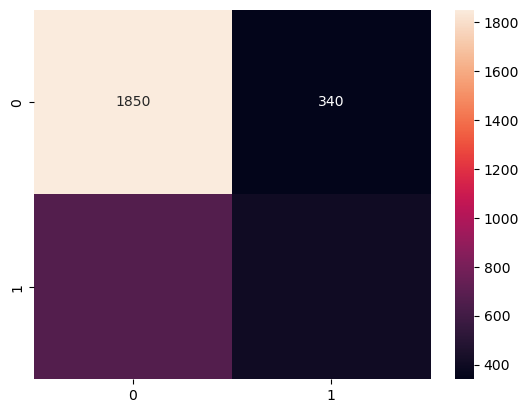

In [38]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt="d")

In [39]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [40]:
# Printing the performance evaluation
accuracy_rf= accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
kappa_rf = cohen_kappa_score(y_test, y_pred)
specificity_rf = specificity_score(y_test, y_pred)
log_loss_rf = log_loss(y_test, y_pred)
roc_auc_score_rf = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Kappa:", kappa_rf)
print("Specificity:", specificity_rf)
print("AUC:", roc_auc_score_rf)
print("Log Loss:", log_loss_rf) 

Accuracy: 0.6902790555044465
Precision: 0.5411605937921727
Recall: 0.37441643323996265
F1 Score: 0.44260485651214126
Kappa: 0.23789194554933113
Specificity: 0.8447488584474886
AUC: 0.6095826458437257
Log Loss: 11.163474370747723


### 4. K-Nearest Neighbor (KNN)

In [41]:
# Initialize the KNN model
model_knn=KNeighborsClassifier()
model_knn.fit(x_train, y_train) 
y_pred = model_knn.predict(x_test) 
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78      2190
           1       0.53      0.42      0.47      1071

    accuracy                           0.69      3261
   macro avg       0.63      0.62      0.62      3261
weighted avg       0.67      0.69      0.68      3261



In [42]:
# Printing the default parameters
print(model_knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


<Axes: >

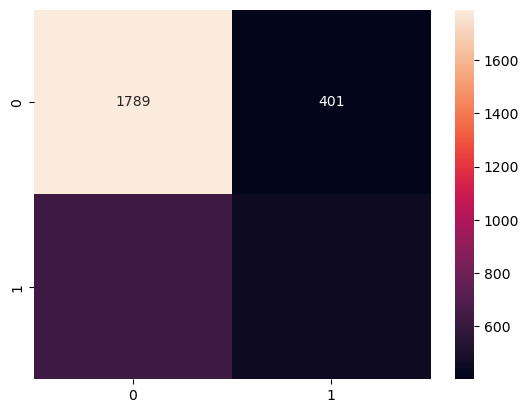

In [43]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt="d")

In [44]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [45]:
# Printing the performance evaluation
accuracy_knn= accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)
kappa_knn = cohen_kappa_score(y_test, y_pred)
specificity_knn = specificity_score(y_test, y_pred)
log_loss_knn = log_loss(y_test, y_pred)
roc_auc_score_knn = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)
print("Kappa:", kappa_knn)
print("Specificity:", specificity_knn)
print("AUC:", roc_auc_score_knn)
print("Log Loss:", log_loss_knn) 

Accuracy: 0.6856792394970868
Precision: 0.527122641509434
Recall: 0.4173669467787115
F1 Score: 0.4658676393955185
Kappa: 0.24742364137060857
Specificity: 0.8168949771689498
AUC: 0.6171309619738307
Log Loss: 11.329268544570708


### 5. Extreme Gradient Boosting (XGBoost)

In [46]:
# Initialize the XGBoost model
model_xgb=xgb.XGBClassifier(enable_categorical=True)
model_xgb.fit(x_train, y_train)
y_pred = model_xgb.predict(x_test) 
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79      2190
           1       0.56      0.41      0.47      1071

    accuracy                           0.70      3261
   macro avg       0.65      0.62      0.63      3261
weighted avg       0.68      0.70      0.68      3261



In [47]:
# Printing the default parameters
print(model_xgb.get_params())

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': True, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


<Axes: >

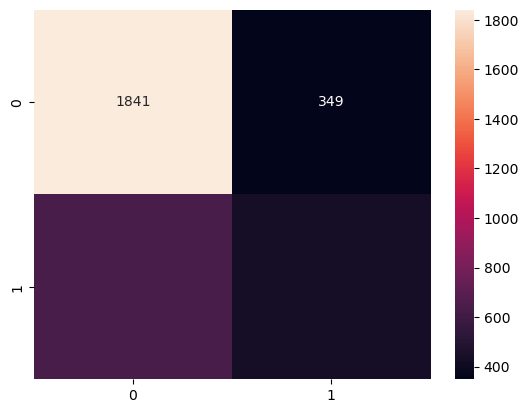

In [48]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt="d")

In [49]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [50]:
# Printing the performance evaluation
accuracy_xgb= accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)
kappa_xgb = cohen_kappa_score(y_test, y_pred)
specificity_xgb = specificity_score(y_test, y_pred)
log_loss_xgb = log_loss(y_test, y_pred)
roc_auc_score_xgb = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)
print("Kappa:", kappa_xgb)
print("Specificity:", specificity_xgb)
print("AUC:", roc_auc_score_xgb)
print("Log Loss:", log_loss_xgb) 

Accuracy: 0.6982520699172033
Precision: 0.5554140127388535
Recall: 0.40709617180205415
F1 Score: 0.4698275862068966
Kappa: 0.26587425239296025
Specificity: 0.8406392694063927
AUC: 0.6238677206042234
Log Loss: 10.876097802787879


### 6. Categorical Boosting (CatBoost)

In [51]:
# List of categorical feature names to be used in the model
# These features are assumed to be categorical variables in the selected features
cat_features=['V190', 'V122', 'V190A', 'V161', 'V159', 'V013', 'V121', 'V701', 'V404',
       'V124', 'V024', 'V106', 'V116', 'V025', 'V119', 'V704', 'V125', 'V201',
       'V213']

In [52]:
# Initialize the CatBoost model
model_cb=CatBoostClassifier(cat_features=cat_features)
model_cb.fit(x_train, y_train)
y_pred = model_cb.predict(x_test) 
# Print the classification report
print(classification_report(y_test, y_pred))

Learning rate set to 0.030845
0:	learn: 0.6865754	total: 212ms	remaining: 3m 31s
1:	learn: 0.6792217	total: 276ms	remaining: 2m 17s
2:	learn: 0.6720264	total: 353ms	remaining: 1m 57s
3:	learn: 0.6653427	total: 426ms	remaining: 1m 45s
4:	learn: 0.6601803	total: 479ms	remaining: 1m 35s
5:	learn: 0.6545227	total: 558ms	remaining: 1m 32s
6:	learn: 0.6487417	total: 641ms	remaining: 1m 30s
7:	learn: 0.6436268	total: 700ms	remaining: 1m 26s
8:	learn: 0.6388492	total: 761ms	remaining: 1m 23s
9:	learn: 0.6345237	total: 824ms	remaining: 1m 21s
10:	learn: 0.6302247	total: 899ms	remaining: 1m 20s
11:	learn: 0.6266025	total: 959ms	remaining: 1m 18s
12:	learn: 0.6230950	total: 1.03s	remaining: 1m 17s
13:	learn: 0.6201625	total: 1.06s	remaining: 1m 14s
14:	learn: 0.6166154	total: 1.13s	remaining: 1m 14s
15:	learn: 0.6138332	total: 1.19s	remaining: 1m 13s
16:	learn: 0.6107533	total: 1.26s	remaining: 1m 13s
17:	learn: 0.6087357	total: 1.3s	remaining: 1m 11s
18:	learn: 0.6063539	total: 1.36s	remaining: 

In [53]:
# Printing the default parameters
print(model_cb.get_params())

{'cat_features': ['V190', 'V122', 'V190A', 'V161', 'V159', 'V013', 'V121', 'V701', 'V404', 'V124', 'V024', 'V106', 'V116', 'V025', 'V119', 'V704', 'V125', 'V201', 'V213']}


<Axes: >

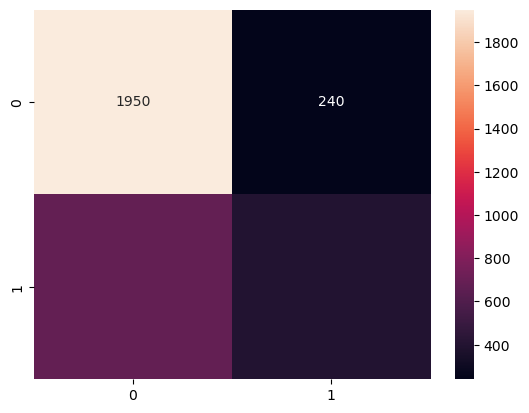

In [54]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt="d")

In [55]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [56]:
# Printing the performance evaluation
accuracy_cb = accuracy_score(y_test, y_pred)
precision_cb = precision_score(y_test, y_pred)
recall_cb = recall_score(y_test, y_pred)
f1_cb = f1_score(y_test, y_pred)
kappa_cb = cohen_kappa_score(y_test, y_pred)
specificity_cb = specificity_score(y_test, y_pred)
log_loss_cb = log_loss(y_test, y_pred)
roc_auc_score_cb = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy_cb)
print("Precision:", precision_cb)
print("Recall:", recall_cb)
print("F1 Score:", f1_cb)
print("Kappa:", kappa_cb)
print("Specificity:", specificity_cb)
print("AUC:", roc_auc_score_cb)
print("Log Loss:", log_loss_cb) 

Accuracy: 0.7194112235510579
Precision: 0.6226415094339622
Recall: 0.3697478991596639
F1 Score: 0.46397188049209137
Kappa: 0.2902801117449987
Specificity: 0.8904109589041096
AUC: 0.6300794290318867
Log Loss: 10.113444603202147


### 7. Multi-Layer Perceptron (MLP)

In [57]:
# Initialize the MLP model
model_mlp=MLPClassifier()
model_mlp.fit(x_train, y_train) 
y_pred = model_mlp.predict(x_test) 
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79      2190
           1       0.57      0.44      0.50      1071

    accuracy                           0.71      3261
   macro avg       0.66      0.64      0.65      3261
weighted avg       0.70      0.71      0.70      3261



In [58]:
# Printing the default parameters
print(model_mlp.get_params())

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


<Axes: >

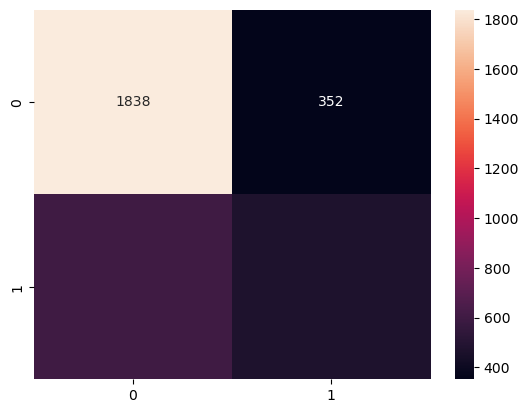

In [59]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt="d")

In [60]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [61]:
# Printing the performance evaluation
accuracy_mlp = accuracy_score(y_test, y_pred)
precision_mlp = precision_score(y_test, y_pred)
recall_mlp = recall_score(y_test, y_pred)
f1_mlp = f1_score(y_test, y_pred)
kappa_mlp = cohen_kappa_score(y_test, y_pred)
specificity_mlp = specificity_score(y_test, y_pred)
log_loss_mlp = log_loss(y_test, y_pred)
roc_auc_score_mlp = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy_mlp)
print("Precision:", precision_mlp)
print("Recall:", recall_mlp)
print("F1 Score:", f1_mlp)
print("Kappa:", kappa_mlp)
print("Specificity:", specificity_mlp)
print("AUC:", roc_auc_score_mlp)
print("Log Loss:", log_loss_mlp) 

Accuracy: 0.7086783195338853
Precision: 0.5733333333333334
Recall: 0.44164332399626516
F1 Score: 0.4989451476793249
Kappa: 0.2984247592570701
Specificity: 0.8392694063926941
AUC: 0.6404563651944797
Log Loss: 10.500297675455782


## Hyperparameter Tuned Classification Algorithm 

### 1. Support Vector Machine (SVM)

In [62]:
# Optimize the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf','linear'],
            } 
model_svm=SVC()
# Set up the GridSearchCV to find the best combination of parameters
grid_search_svm= GridSearchCV(estimator=model_svm, param_grid=param_grid,refit = True, cv=5, n_jobs=-1, verbose=3) 
grid_search_svm.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [63]:
# Printing the  parameters
print(grid_search_svm.best_params_) 
print(grid_search_svm.best_estimator_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.001)


In [64]:
# Print the classification report
y_pred_svm = grid_search_svm.predict(x_test) 
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.73      0.93      0.81      2190
           1       0.65      0.28      0.39      1071

    accuracy                           0.71      3261
   macro avg       0.69      0.60      0.60      3261
weighted avg       0.70      0.71      0.68      3261



<Axes: >

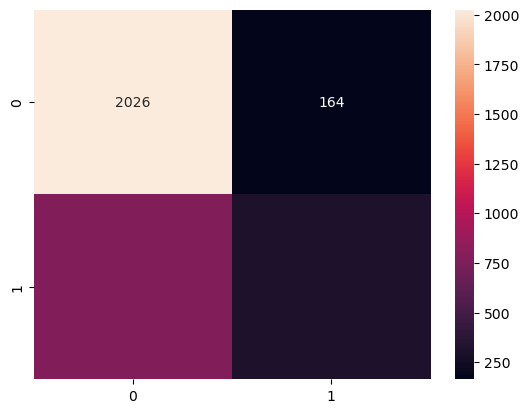

In [65]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(confusion_matrix_svm,annot=True,fmt="d")

In [66]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred_svm):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_svm)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [67]:
# Printing the performance evaluation
accuracy_svm= accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
kappa_svm = cohen_kappa_score(y_test, y_pred_svm)
specificity_svm = specificity_score(y_test, y_pred_svm)
log_loss_svm = log_loss(y_test, y_pred_svm)
roc_auc_score_svm = roc_auc_score(y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)
print("Kappa:",kappa_svm)
print("Specificity:", specificity_svm)
print("AUC:", roc_auc_score_svm)
print("Log Loss:", log_loss_svm) 

Accuracy: 0.714198098742717
Precision: 0.6488222698072805
Recall: 0.28291316526610644
F1 Score: 0.3940182054616385
Kappa: 0.24304526109410873
Specificity: 0.9251141552511416
AUC: 0.6040136602586239
Log Loss: 10.301344666868195


In [68]:
# Calculating the False Positive Rate (FPR) and True Positive Rate (TPR) for the ROC curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
# Calculating the Area Under the Curve (AUC) for the ROC curve
auc_svm = roc_auc_score(y_test, y_pred_svm)

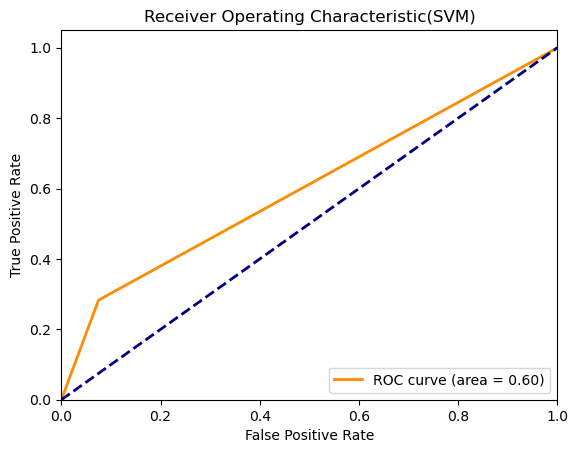

In [69]:
# Plotting the ROC curve with the FPR and TPR values
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (area = {auc_svm:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(SVM)')
plt.legend(loc="lower right")
plt.show()

### 2. Logistic Regression (LR)

In [73]:
# Optimize the parameter grid for hyperparameter tuning
param_grid={
"penalty" : ["l1","elasticnet"],
"solver" : ["lbfgs","liblinear","sag","saga"],
"max_iter" : [100,300,500,1000],
'C':np.linspace(0,1,30)
}
model_lr = LogisticRegression(random_state= 42)
# Set up the GridSearchCV to find the best combination of parameters
grid_search_lr = GridSearchCV(estimator= model_lr, param_grid= param_grid, cv=5, scoring= 'accuracy', n_jobs=-1, verbose=1)
grid_search_lr.fit(x_train, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ]),
                         'max_iter': [100, 300, 500, 1000],
                         'penalty': ['l1', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy', verbose=1)

In [74]:
# Printing the best parameters and estimators
print(grid_search_lr.best_params_) 
print(grid_search_lr.best_estimator_)

{'C': 0.10344827586206896, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=0.10344827586206896, penalty='l1', random_state=42,
                   solver='liblinear')


In [75]:
# Print the classification report
y_pred_lr = grid_search_lr.predict(x_test) 
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81      2190
           1       0.62      0.34      0.44      1071

    accuracy                           0.72      3261
   macro avg       0.68      0.62      0.63      3261
weighted avg       0.70      0.72      0.69      3261



<Axes: >

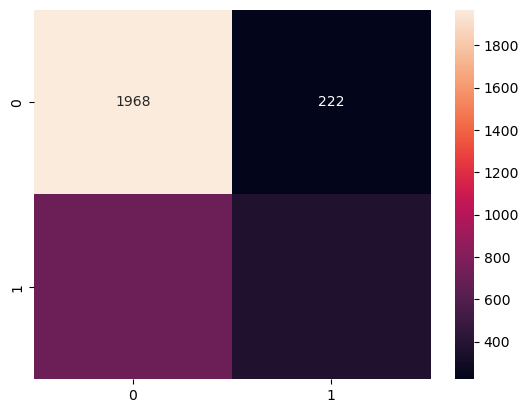

In [76]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(confusion_matrix_lr,annot=True,fmt="d")

In [77]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred_lr):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_lr)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [78]:
# Printing the performance evaluation
accuracy_lr= accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
kappa_lr = cohen_kappa_score(y_test, y_pred_lr)
specificity_lr = specificity_score(y_test, y_pred_lr)
log_loss_lr = log_loss(y_test, y_pred_lr)
roc_auc_score_lr = roc_auc_score(y_test, y_pred_lr)

print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)
print("Kappa:", kappa_lr)
print("Specificity:", specificity_lr)
print("AUC:", roc_auc_score_lr)
print("Log Loss:", log_loss_lr) 

Accuracy: 0.7157313707451702
Precision: 0.6224489795918368
Recall: 0.34173669467787116
F1 Score: 0.4412296564195298
Kappa: 0.27166731357621
Specificity: 0.8986301369863013
AUC: 0.6201834158320864
Log Loss: 10.246079942260533


In [79]:
# Calculating the False Positive Rate (FPR) and True Positive Rate (TPR) for the ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
# Calculating the Area Under the Curve (AUC) for the ROC curve
auc_lr = roc_auc_score(y_test, y_pred_lr)

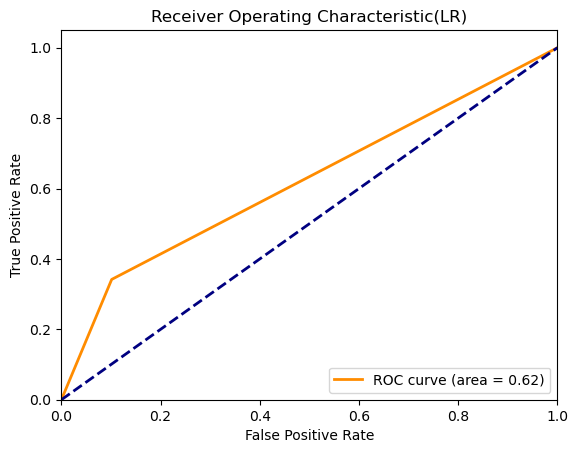

In [80]:
# Plotting the ROC curve with the FPR and TPR values
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_lr:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(LR)')
plt.legend(loc="lower right")
plt.show()

### 3. Random Forest (RF)

In [81]:
# Optimize the parameter grid for hyperparameter tuning
param_grid = { 
	'n_estimators': [25, 50, 100, 150], 
	'max_features': ['sqrt', 'log2'], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],  
    'criterion': ['gini', 'entropy']  
}
model_rf = RandomForestClassifier(random_state=42)
# Set up the GridSearchCV to find the best combination of parameters
grid_search_rf = GridSearchCV(estimator= model_rf, param_grid= param_grid, refit=True, cv=5, verbose=True, n_jobs=-1,scoring='accuracy')
grid_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [25, 50, 100, 150]},
             scoring='accuracy', verbose=True)

In [82]:
# Printing the best parameters and estimators
print(grid_search_rf.best_params_) 
print(grid_search_rf.best_estimator_)

{'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=150, random_state=42)


In [83]:
# Print the classification report
y_pred_rf = grid_search_rf.predict(x_test) 
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      2190
           1       0.62      0.37      0.46      1071

    accuracy                           0.72      3261
   macro avg       0.68      0.63      0.64      3261
weighted avg       0.70      0.72      0.70      3261



<Axes: >

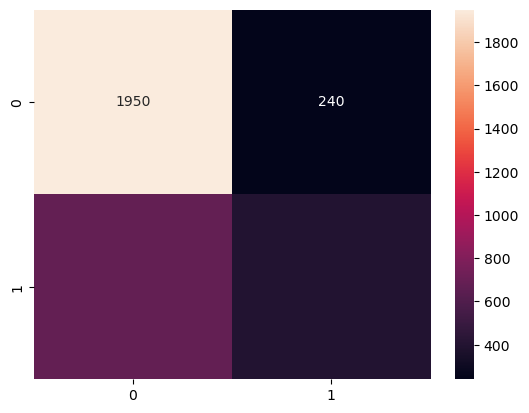

In [84]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(confusion_matrix_rf,annot=True,fmt="d")

In [85]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred_rf):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_rf)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [86]:
# Printing the performance evaluation
accuracy_rf= accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
kappa_rf = cohen_kappa_score(y_test, y_pred_rf)
specificity_rf = specificity_score(y_test, y_pred_rf)
log_loss_rf = log_loss(y_test, y_pred_rf)
roc_auc_score_rf = roc_auc_score(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Kappa:", kappa_rf)
print("Specificity:", specificity_rf)
print("AUC:", roc_auc_score_rf)
print("Log Loss:", log_loss_rf) 

Accuracy: 0.7187979147500767
Precision: 0.6214511041009464
Recall: 0.3678804855275444
F1 Score: 0.4621700879765396
Kappa: 0.2883499838290404
Specificity: 0.8904109589041096
AUC: 0.629145722215827
Log Loss: 10.135550493045208


In [87]:
# Calculating the False Positive Rate (FPR) and True Positive Rate (TPR) for the ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
# Calculating the Area Under the Curve (AUC) for the ROC curve
auc_rf = roc_auc_score(y_test, y_pred_rf)

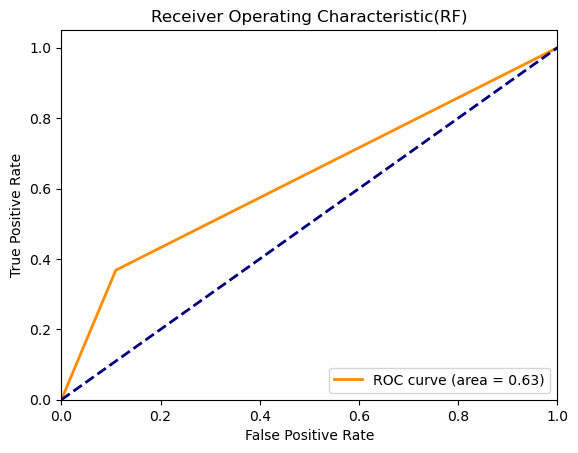

In [88]:
# Plotting the ROC curve with the FPR and TPR values
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {auc_rf:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(RF)')
plt.legend(loc="lower right")
plt.show()

### 4. K-Nearest Neighbor (KNN)

In [89]:
# Optimize the parameter grid for hyperparameter tuning
param_grid = {
    "n_neighbors" : [3,4,5,8,10],
    'metric': ['euclidean', 'manhattan'],
    "weights" : ["uniform","distance"],
    "algorithm" : ["auto","ball_tree","kd_tree","brute"],
    "leaf_size" : [10,20,30,40,50],
}
model_knn = KNeighborsClassifier()
# Set up the GridSearchCV to find the best combination of parameters
grid_search_knn= GridSearchCV(estimator= model_knn, param_grid= param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_knn.fit(x_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 4, 5, 8, 10],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [90]:
# Printing the best parameters and estimators
print(grid_search_knn.best_params_) 
print(grid_search_knn.best_estimator_)

{'algorithm': 'ball_tree', 'leaf_size': 50, 'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='ball_tree', leaf_size=50, metric='euclidean',
                     n_neighbors=10)


In [91]:
# Print the classification report
y_pred_knn = grid_search_knn.predict(x_test) 
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80      2190
           1       0.58      0.31      0.41      1071

    accuracy                           0.70      3261
   macro avg       0.65      0.60      0.60      3261
weighted avg       0.68      0.70      0.67      3261



<Axes: >

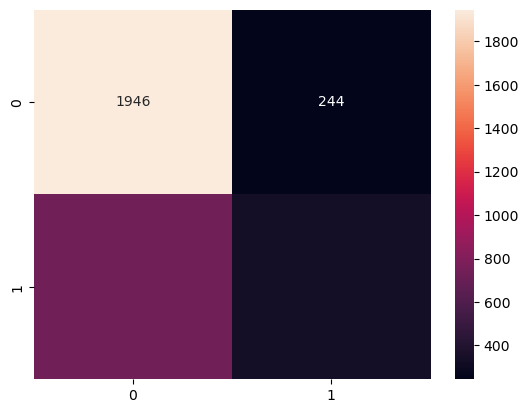

In [92]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(confusion_matrix_knn,annot=True,fmt="d")

In [93]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred_knn):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_knn)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [94]:
# Printing the performance evaluation
accuracy_knn= accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
kappa_knn = cohen_kappa_score(y_test, y_pred_knn)
specificity_knn = specificity_score(y_test, y_pred_knn)
log_loss_knn = log_loss(y_test, y_pred_knn)
roc_auc_score_knn = roc_auc_score(y_test, y_pred_knn)

print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)
print("Kappa:", kappa_knn)
print("Specificity:", specificity_knn)
print("AUC:", roc_auc_score_knn)
print("Log Loss:", log_loss_knn) 

Accuracy: 0.7000919963201472
Precision: 0.5800344234079173
Recall: 0.3146591970121382
F1 Score: 0.40799031476997577
Kappa: 0.2301443272092636
Specificity: 0.8885844748858448
AUC: 0.6016218359489913
Log Loss: 10.809780133258688


In [95]:
# Calculating the False Positive Rate (FPR) and True Positive Rate (TPR) for the ROC curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
# Calculating the Area Under the Curve (AUC) for the ROC curve
auc_knn = roc_auc_score(y_test, y_pred_knn)

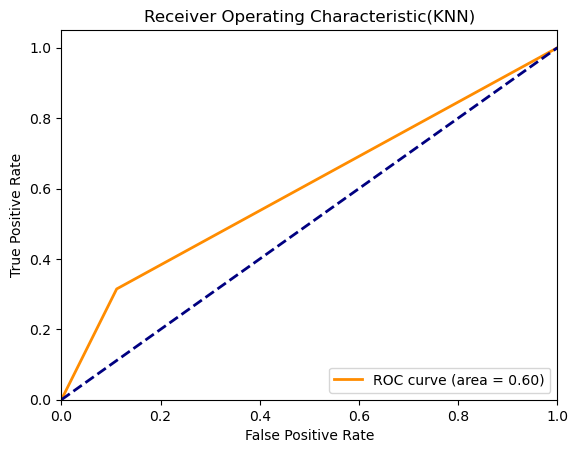

In [96]:
# Plotting the ROC curve with the FPR and TPR values
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (area = {auc_knn:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(KNN)')
plt.legend(loc="lower right")
plt.show()

### 5. Extreme Gradient Boosting (XGBoost)

In [97]:
# Optimize the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}
model_xgb = xgb.XGBClassifier(enable_categorical=True, random_state=42)
# Set up the GridSearchCV to find the best combination of parameters
grid_search_xgb = GridSearchCV(estimator= model_xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(x_train, y_train)

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             verbose=2)

In [98]:
# Printing the best parameters and estimators
print(grid_search_xgb.best_params_) 
print(grid_search_xgb.best_estimator_)

{'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.6}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [99]:
# Print the classification report
y_pred_xgb = grid_search_xgb.predict(x_test) 
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82      2190
           1       0.64      0.38      0.48      1071

    accuracy                           0.73      3261
   macro avg       0.70      0.64      0.65      3261
weighted avg       0.71      0.73      0.71      3261



<Axes: >

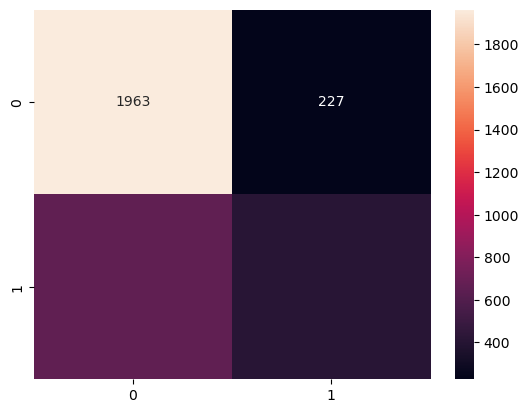

In [100]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(confusion_matrix_xgb,annot=True,fmt="d")

In [101]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred_xgb):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_xgb)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [102]:
# Printing the performance evaluation
accuracy_xgb= accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
kappa_xgb = cohen_kappa_score(y_test, y_pred_xgb)
specificity_xgb = specificity_score(y_test, y_pred_xgb)
log_loss_xgb = log_loss(y_test, y_pred_xgb)
roc_auc_score_xgb = roc_auc_score(y_test, y_pred_xgb)

print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)
print("Kappa:", kappa_xgb)
print("Specificity:", specificity_xgb)
print("AUC:", roc_auc_score_xgb)
print("Log Loss:", log_loss_xgb) 

Accuracy: 0.7283042011652867
Precision: 0.6447574334898278
Recall: 0.38468720821662
F1 Score: 0.4818713450292398
Kappa: 0.3133222675690398
Specificity: 0.8963470319634703
AUC: 0.6405171200900451
Log Loss: 9.792909200477705


In [103]:
# Calculating the False Positive Rate (FPR) and True Positive Rate (TPR) for the ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
# Calculating the Area Under the Curve (AUC) for the ROC curve
auc_xgb = roc_auc_score(y_test, y_pred_xgb)

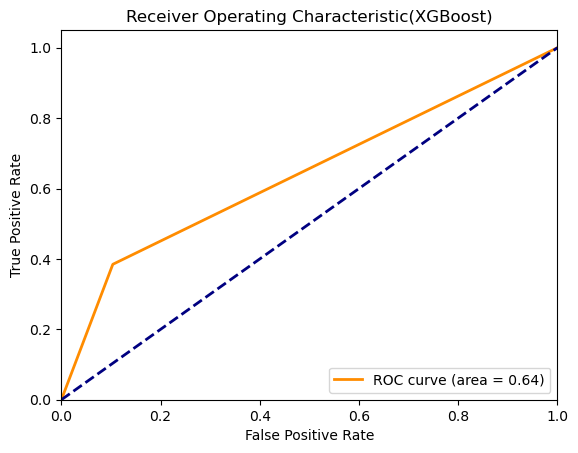

In [104]:
# Plotting the ROC curve with the FPR and TPR values
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {auc_xgb:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(XGBoost)')
plt.legend(loc="lower right")
plt.show()

#### Feature Importance

In [126]:
# Compute permutation importance
perm_importance= permutation_importance(grid_search_xgb, x_test, y_test, n_repeats=30, random_state=42)
importance_df = pd.DataFrame(perm_importance.importances_mean, index=x_selected.columns, columns=["Importance"])
importance_df = importance_df.sort_values(by="Importance", ascending=False)
# Display the results
print(importance_df)

       Importance
V013     0.024205
V122     0.013237
V190     0.010181
V024     0.009077
V404     0.007002
V201     0.003220
V701     0.002801
V161     0.002729
V190A    0.002453
V704     0.001666
V116     0.001400
V213     0.000583
V121     0.000562
V125     0.000276
V106     0.000194
V119    -0.000061
V124    -0.000061
V159    -0.000450
V025    -0.000838


### 6. Categorical Boosting (CatBoost)

In [105]:
cat_features = ['V190', 'V122', 'V190A', 'V161', 'V159', 'V013', 'V121', 'V701', 'V404','V124', 'V024', 'V106', 'V116', 'V025', 'V119', 
               'V704', 'V125', 'V201', 'V213']
model_cb = CatBoostClassifier(random_state=42, verbose=False,cat_features = cat_features )
# Optimize the parameter grid for hyperparameter tuning
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 300],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}
# Set up the GridSearchCV to find the best combination of parameters
grid_search_cb = GridSearchCV(estimator= model_cb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_cb.fit(x_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000021410AF1990>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5, 7, 9],
                         'learning_rate': [0.01, 0.05, 0.1]},
             verbose=2)

In [106]:
# Printing the best parameters and estimators
print(grid_search_cb.best_params_) 
print(grid_search_cb.best_estimator_)

{'depth': 8, 'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.05}


In [107]:
# Print the classification report
y_pred_cb = grid_search_cb.predict(x_test) 
print(classification_report(y_test, y_pred_cb))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81      2190
           1       0.63      0.38      0.47      1071

    accuracy                           0.72      3261
   macro avg       0.69      0.63      0.64      3261
weighted avg       0.71      0.72      0.70      3261



<Axes: >

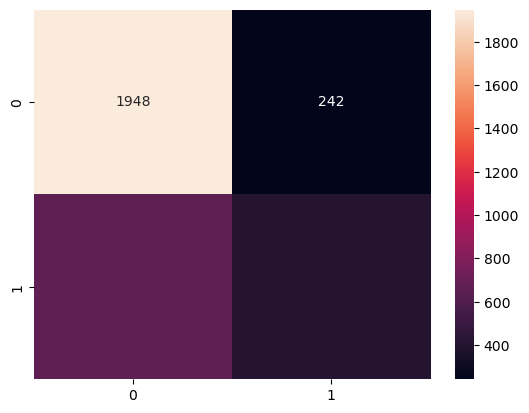

In [108]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix_cb = confusion_matrix(y_test, y_pred_cb)
sns.heatmap(confusion_matrix_cb,annot=True,fmt="d")

In [109]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred_cb):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_cb)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [110]:
# Printing the performance evaluation
accuracy_cb = accuracy_score(y_test, y_pred_cb)
precision_cb = precision_score(y_test, y_pred_cb)
recall_cb = recall_score(y_test, y_pred_cb)
f1_cb = f1_score(y_test, y_pred_cb)
kappa_cb = cohen_kappa_score(y_test, y_pred_cb)
specificity_cb = specificity_score(y_test, y_pred_cb)
log_loss_cb = log_loss(y_test, y_pred_cb)
roc_auc_score_cb = roc_auc_score(y_test, y_pred_cb)

print("Accuracy:", accuracy_cb)
print("Precision:", precision_cb)
print("Recall:", recall_cb)
print("F1 Score:", f1_cb)
print("Kappa:", kappa_cb)
print("Specificity:", specificity_cb)
print("AUC:", roc_auc_score_cb)
print("Log Loss:", log_loss_cb) 

Accuracy: 0.7215578043544925
Precision: 0.6259659969088099
Recall: 0.37815126050420167
F1 Score: 0.47147846332945287
Kappa: 0.2977656477231009
Specificity: 0.8894977168949771
AUC: 0.6338244886995894
Log Loss: 10.036073988751419


In [111]:
# Calculating the False Positive Rate (FPR) and True Positive Rate (TPR) for the ROC curve
fpr_cb, tpr_cb, _ = roc_curve(y_test, y_pred_cb)
# Calculating the Area Under the Curve (AUC) for the ROC curve
auc_cb = roc_auc_score(y_test, y_pred_cb)

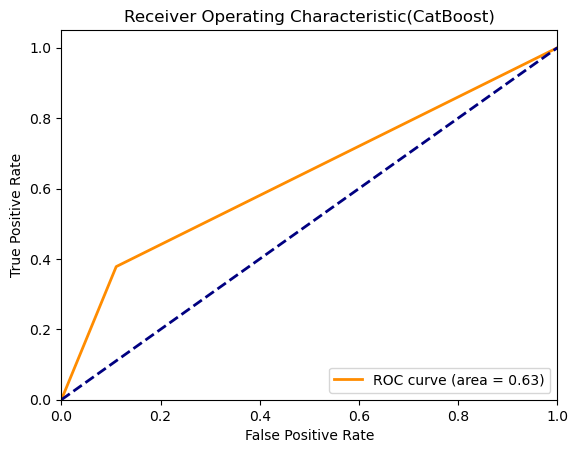

In [112]:
# Plotting the ROC curve with the FPR and TPR values
plt.figure()
plt.plot(fpr_cb, tpr_cb, color='darkorange', lw=2, label=f'ROC curve (area = {auc_cb:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(CatBoost)')
plt.legend(loc="lower right")
plt.show()

### 7. Multi-Layer Perceptron (MLP)

In [113]:
# Optimize the parameter grid for hyperparameter tuning
param_grid= {
   'hidden_layer_sizes': [(50,), (50,50), (100,),(100,50)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001,0.001,.01, 0.05],
    'learning_rate': ['constant','adaptive','invscaling'],
}
model_mlp=MLPClassifier(random_state=42)
# Set up the GridSearchCV to find the best combination of parameters
grid_search_mlp= GridSearchCV( estimator= model_mlp, param_grid=param_grid, cv = 5, n_jobs=-1, verbose=2)
grid_search_mlp.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01, 0.05],
                         'hidden_layer_sizes': [(50,), (50, 50), (100,),
                                                (100, 50)],
                         'learning_rate': ['constant', 'adaptive',
                                           'invscaling'],
                         'solver': ['sgd', 'adam']},
             verbose=2)

In [114]:
# Printing the best parameters and estimators
print(grid_search_mlp.best_params_) 
print(grid_search_mlp.best_estimator_)

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'sgd'}
MLPClassifier(alpha=0.01, random_state=42, solver='sgd')


In [115]:
# Print the classification report
y_pred_mlp = grid_search_mlp.predict(x_test) 
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81      2190
           1       0.62      0.38      0.47      1071

    accuracy                           0.72      3261
   macro avg       0.68      0.63      0.64      3261
weighted avg       0.70      0.72      0.70      3261



<Axes: >

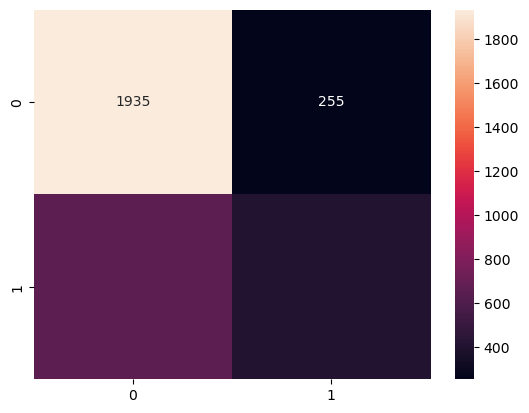

In [116]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(confusion_matrix_mlp,annot=True,fmt="d")

In [117]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred_mlp):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_mlp)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [118]:
# Printing the performance evaluation
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
kappa_mlp = cohen_kappa_score(y_test, y_pred_mlp)
specificity_mlp = specificity_score(y_test, y_pred_mlp)
log_loss_mlp = log_loss(y_test, y_pred_mlp)
roc_auc_score_mlp = roc_auc_score(y_test, y_pred_mlp)

print("Accuracy:", accuracy_mlp)
print("Precision:", precision_mlp)
print("Recall:", recall_mlp)
print("F1 Score:", f1_mlp)
print("Kappa:", kappa_mlp)
print("Specificity:", specificity_mlp)
print("AUC:", roc_auc_score_mlp)
print("Log Loss:", log_loss_mlp) 

Accuracy: 0.7191045691505673
Precision: 0.6165413533834586
Recall: 0.3828197945845005
F1 Score: 0.47235023041474655
Kappa: 0.29494654523155706
Specificity: 0.8835616438356164
AUC: 0.6331907192100584
Log Loss: 10.124497548123674


In [119]:
# Calculating the False Positive Rate (FPR) and True Positive Rate (TPR) for the ROC curve
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp)
# Calculating the Area Under the Curve (AUC) for the ROC curve
auc_mlp = roc_auc_score(y_test, y_pred_mlp)

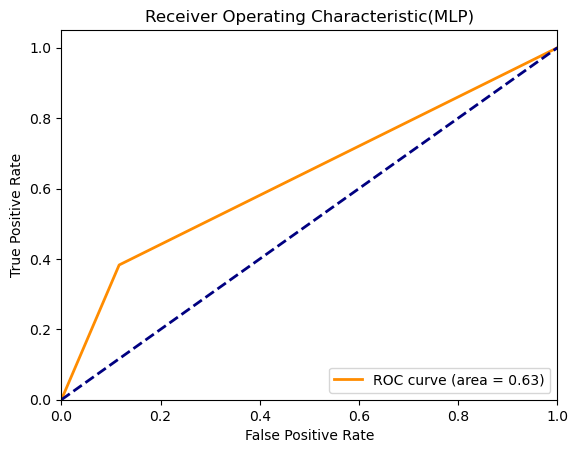

In [120]:
# Plotting the ROC curve with the FPR and TPR values
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'ROC curve (area = {auc_mlp:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(MLP)')
plt.legend(loc="lower right")
plt.show()

## Combined ROC Curve

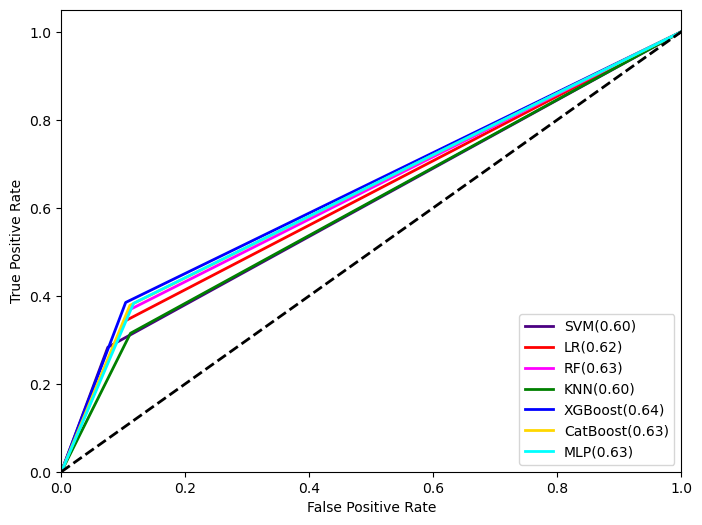

In [121]:
# Plotting ROC curves for multiple algorithms
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='indigo', lw=2, label=f'SVM({auc_svm:0.2f})')
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'LR({auc_lr:0.2f})')
plt.plot(fpr_rf, tpr_rf, color='magenta', lw=2, label=f'RF({auc_rf:0.2f})')
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'KNN({auc_knn:0.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'XGBoost({auc_xgb:0.2f})')
plt.plot(fpr_cb, tpr_cb, color='gold', lw=2, label=f'CatBoost({auc_cb:0.2f})')
plt.plot(fpr_mlp, tpr_mlp, color='cyan', lw=2, label=f'MLP({auc_mlp:0.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()